# image classification

# data collection

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2020-07-11 03:46:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  37.8MB/s    in 1.7s    

2020-07-11 03:46:36 (37.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [ ]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))


1000
1000


In [ ]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
## directory with the training cat pictures 
train_cat_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
## files names
train_cat_filenames=os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [ ]:
os.listdir()

['.config', 'sample_data']

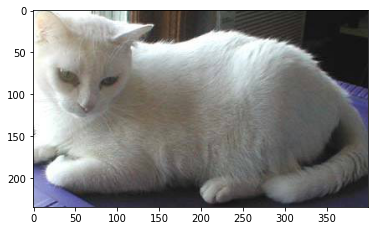

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

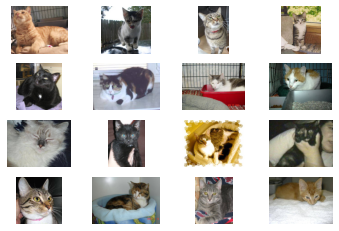

In [ ]:
import matplotlib.pyplot as plt
j=1## plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j+=1


In [ ]:
pwd


'/content'

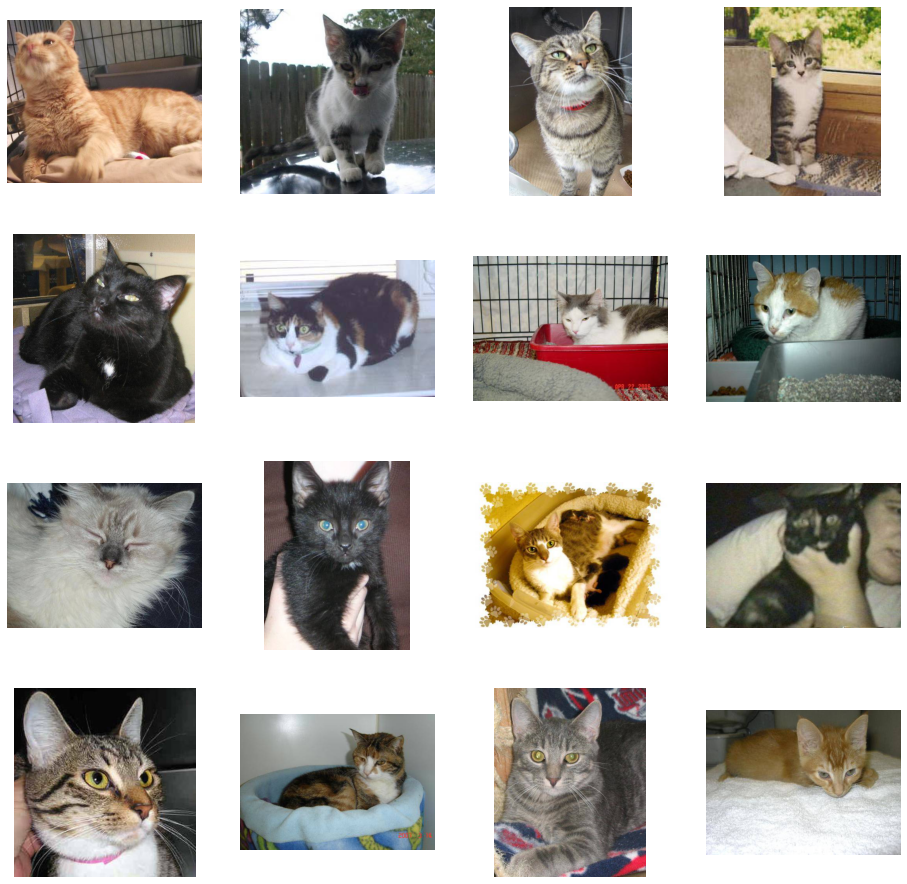

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1## plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j+=1


# data preprocessing 
read the image data<br>
we have different shapes here<br>
We need same shape for each image<br>
reshaing the images<br>
cats and dogs labelling<br>

# Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
# https://docs.google.com/document/d/1tXQsUti1rOXf4S4ypCBW8209YQzLK8RdDdxgeTM-7Do/edit?usp=sharing


(20, 150, 150, 3)
(20,)


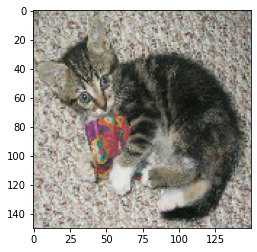

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

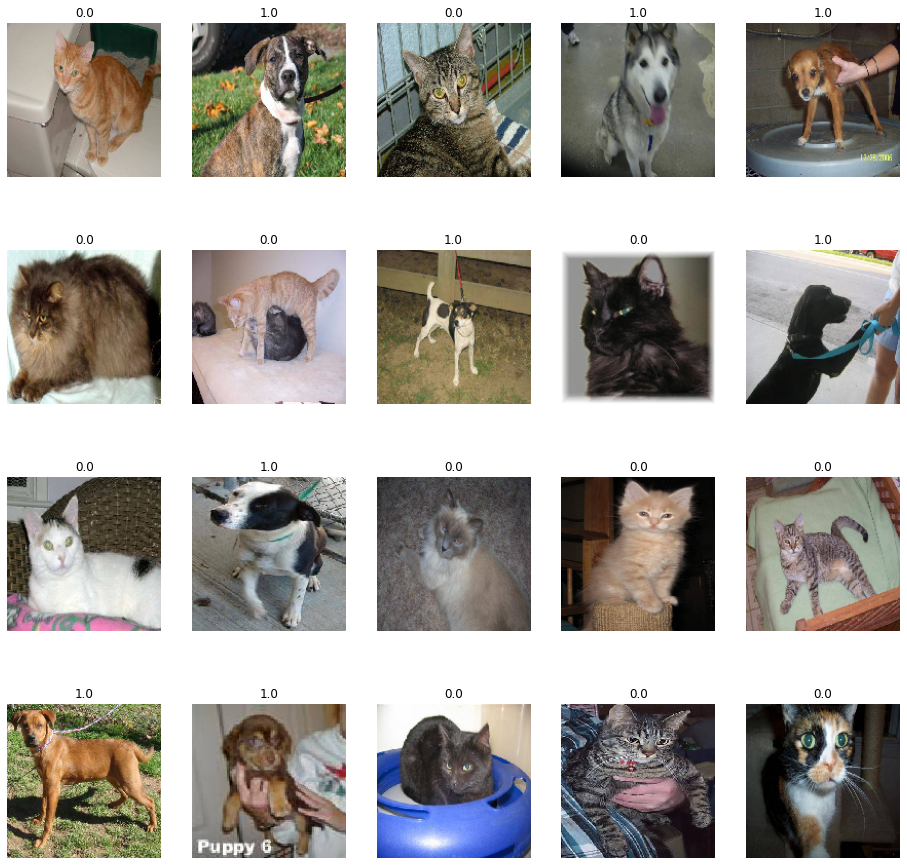

In [ ]:
plt.figure(figsize=(16,16))
pos=1
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1


# build the model

In [ ]:
## import the required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model=Sequential()
## add a conv layer followed by maxpoolling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpoolling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpoolling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# convert the feature map into one d array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))



## lets save the summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

(3*(3*3)+1)*16<br>
(16*(3*3)+1)*32)<br>
512*18496+512<br>


 # https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy


In [43]:
## tp complile the model
import tensorflow as tf 
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

# TRAIN THE MODEL

In [44]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 90ms/step - loss: 0.7771 - accuracy: 0.5560 - val_loss: 0.6876 - val_accuracy: 0.5500
Epoch 2/15
100/100 [==============================] - 9s 88ms/step - loss: 0.6293 - accuracy: 0.6630 - val_loss: 0.5916 - val_accuracy: 0.6800
Epoch 3/15
100/100 [==============================] - 9s 87ms/step - loss: 0.5456 - accuracy: 0.7200 - val_loss: 0.6151 - val_accuracy: 0.6850
Epoch 4/15
100/100 [==============================] - 9s 88ms/step - loss: 0.4621 - accuracy: 0.7790 - val_loss: 0.5810 - val_accuracy: 0.7200
Epoch 5/15
100/100 [==============================] - 9s 88ms/step - loss: 0.3727 - accuracy: 0.8220 - val_loss: 0.6583 - val_accuracy: 0.6740
Epoch 6/15
100/100 [==============================] - 9s 87ms/step - loss: 0.2837 - accuracy: 0.8850 - val_loss: 1.0042 - val_accuracy: 0.6650
Epoch 7/15
100/100 [==============================] - 9s 88ms/step - loss: 0.2137 - accuracy: 0.9075 - val_loss: 0.7478 - val_accuracy: 0.7270

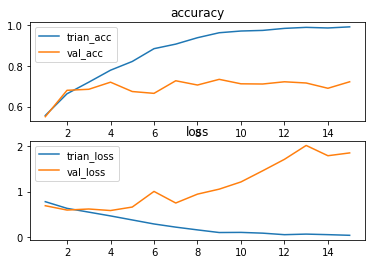

In [49]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='trian_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='trian_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()



# to check for an image
 1. read the data <br>
 2 check the shape<br>
 3. resize it into required shape(150,1,150,3)<br>
 4. apply the scaling

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image


In [60]:
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img('/tmp/maxresdefault.jpg')
print(type(img))
# print(img.shape)
img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img=tf.image.resize(img,(150,150))
# scaling
img=img/255
print(img.shape)
img=np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(720, 1280, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [61]:
model.predict(img)

array([[1.]], dtype=float32)

above is an dog prediction

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img('/tmp/cat.jpg')
print(type(img))
# print(img.shape)
img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img=tf.image.resize(img,(150,150))
# scaling
img=img/255
print(img.shape)
img=np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1200, 1800, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [63]:
model.predict(img)

array([[0.00010435]], dtype=float32)

above is an cat prediction